<a href="https://colab.research.google.com/github/Spookytober/Datascience/blob/main/Aubr_OrfU6Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 6 Project: Generalized Linear Model (with multiple predictors)

In [2]:
#installing libraries
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-azn98d6w
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-azn98d6w
  Resolved https://github.com/pydata/xarray.git to commit 326dbe78d7ea887c2c242e811b7973661137617f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.2.dev31+g326dbe78-py3-none-any.whl size=1247997 sha256=f45466b7fe6cdf1c793c3805052808532a55198df256d3790ceb0c76b3f63379
  Stored in directory: /tmp/pip-ephem-wheel-cache-usc_r0dh/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.1
    Uninstalling xarray-2025.1.1:
      Successfully uninstalled xarray-2025.1.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.6 MB/s eta 0:00:00
   ━

This time around, I'll be predicting... something... based on the cardinal dataset I used back in project 3. The reason I didn't specify what I'm predicting right now is because it changed a couple of times through my process.

I'll begin with importing my dataset though. This dataset contains information about 432 Northern Cardinals in multiple locations in the United States, those being Ohio, New York, Mississippi, and Florida. It has tail length, tarsus (leg bone) length, wing chord length, crest length, mass, and sex of each and every bird included in the data set.

In [3]:
card = pd.read_csv('https://raw.githubusercontent.com/Spookytober/Datascience/refs/heads/main/full%20cardinal%20data%20-%20Northern%20Cardinal%20data.csv', dtype={'location':'category', 'sex':'category'})

In [ ]:
card

,location,sex,mass,tarsus_length,crest,wing_chord,tail
0,Ohio,male,43.3,25.00,29.0,94.5,102.0
1,Ohio,male,44.8,25.00,30.0,95.0,102.0
2,Ohio,male,44.0,25.50,29.0,92.0,100.0
3,Ohio,male,44.7,25.00,31.0,95.0,104.0
4,Ohio,male,42.2,25.00,30.0,94.0,105.0
...,...,...,...,...,...,...,...
427,Florida,female,38.1,22.95,32.0,86.0,99.0
428,Florida,female,31.7,24.14,28.0,83.0,90.0
429,Florida,female,34.6,23.87,25.0,80.0,88.0
430,Florida,female,33.7,24.66,24.0,82.0,91.0


I began by attempting to predict mass based on the other variables. This wasn't a good idea for reasons that were later explained to me, but I didn't fully understand that at the time.

The first model I ran was an attempt to predict mass based on every other varibale in the dataset.

In [ ]:
model_all_noint = bmb.Model("mass ~ location + sex + tarsus_length + crest + wing_chord + tail", data=card)
idata_all_noint = model_all_noint.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

I ran a few more models, these ones using my knowledge of how the variables affected one another. I knew that location and sex of the bird affected not only mass, but also everything else, so I made sure to tell my models that they had interactions.

In [ ]:
#This model has sex and location interacting with every other variable aside from each other.
model_lox_int = bmb.Model("mass ~ location + sex + tarsus_length + crest + wing_chord + tail + location:tarsus_length + location:crest + location:wing_chord + location:tail + sex:tarsus_length + sex:crest + sex:wing_chord + sex:tail", data=card)
idata_lox_int = model_lox_int.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [ ]:
#this model has sex interacting with everything but location.
model_sex = bmb.Model("mass ~ location + sex + tarsus_length + crest + wing_chord + tail + sex:tarsus_length + sex:crest + sex:wing_chord + sex:tail", data=card)
idata_sex = model_sex.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [ ]:
#this model has location interacting with everything but sex.
model_loc = bmb.Model("mass ~ location + sex + tarsus_length + crest + wing_chord + tail + location:tarsus_length + location:crest + location:wing_chord + location:tail", data=card)
idata_loc = model_loc.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [ ]:
az.compare({"all_no_int":idata_all_noint, "lox_int":idata_lox_int, "sex":idata_sex, "location":idata_loc})

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
sex,0,-1051.630861,12.036287,0.000000,8.354010e-01,16.347117,0.000000,False,log
all_no_int,1,-1054.870968,9.471558,3.240107,1.645990e-01,16.530797,3.135479,False,log
lox_int,2,-1056.998885,19.577536,5.368024,5.457199e-15,16.268528,2.162020,True,log
location,3,-1058.783388,16.977533,7.152527,0.000000e+00,16.605373,3.728912,False,log


All four of these models came out to be relatively the same. The model that had sex interactions performed slightly better than the location interactions, but not by any important difference.

Next, I tried predicting mass based on a few combinations of interactions that I thought could be realistic. The model name "pr" stands for possibly real, and I used only the variables that I thought had a connection with mass based on my DAG.

In [ ]:
model_pr = bmb.Model("mass ~ location + sex + tarsus_length + location:tarsus_length + sex:tarsus_length + tail + location:tail", data=card)
idata_pr = model_pr.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [ ]:
model_pr2 = bmb.Model("mass ~ location + sex + tarsus_length + crest + wing_chord + tail + location:tarsus_length + sex:crest + sex:tail + location:tail + sex:wing_chord", data=card)
idata_pr2 = model_pr2.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

This next model was a last resort to try and predict mass well. I was struggling to find any good way to predict mass, so I tried just using a semi-informed set of variables. Sex influences crest length, and crest length *might* have an affect on mass, so I tried to use it. The model came out worse than any of the other models predicting mass, though.

In [ ]:
model_mass = bmb.Model('mass ~ crest + sex + location + sex:crest', data = card)
idata_mass = model_mass.fit(idata_kwargs = {'log_likelihood':True})

Output()

Output()

Everything up until now had had a similar elpd_loo value of around 1050-1060. I decided it might be a good idea to try predicting something other than mass. In one of my last projects, I tried to predict the tail length of these birds, so I tried doing that a couple of times, trying to use my DAG and my knowledge of cardinals to inform the interactions in the model.

In [ ]:
model_length = bmb.Model("tail ~ mass +location+sex+tarsus_length+crest+wing_chord", data = card)
idata_length = model_length.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [ ]:
model_length2 = bmb.Model("tail ~ mass + location + sex + tarsus_length + location:mass + location:tarsus_length + sex:mass + sex:tarsus_length", data = card)
idata_length2 = model_length2.fit(idata_kwargs={'log_likelihood': True})

Output()

Output()

In [ ]:
az.compare({"length":idata_length, "noint":idata_all_noint, "pr1":idata_pr, "pr2":idata_pr2, "length2":idata_length2, "mass":idata_mass})

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
pr1,0,-1054.609879,11.925285,0.000000,3.626003e-01,16.508028,0.000000,False,log
noint,1,-1055.108306,9.745850,0.498427,2.045330e-01,16.593860,2.994181,False,log
pr2,2,-1055.384872,15.324322,0.774993,2.150925e-01,16.412843,3.022688,True,log
mass,3,-1076.947822,7.705908,22.337943,3.906054e-11,15.762931,6.460797,False,log
length,4,-1154.852066,15.985308,100.242187,2.177743e-01,26.047477,30.407697,True,log
length2,5,-1232.119768,20.163203,177.509889,0.000000e+00,22.812194,27.878966,True,log


I compared these models to each other, and the "possibly real" models performed similarly to the model that had no interactions. The last-ditch attempt at a mass model was solidly worse than those, and the models that tried to predict tail length were positively abysmal compared to any other model I had run so far. This informed me that mass might not have been the best thing to predict, especially based off the variables I had. It also informed me that tail length was even WORSE to predict. I decided to move to another one of my variables wing length.

In [ ]:
model_wing = bmb.Model('wing_chord ~ location + sex + mass +location:mass + sex:mass', data = card)
idata_wing = model_wing.fit(idata_kwargs = {'log_likelihood':True})
#elpd_loo of -986 (significant improvement from previous)

Output()

Output()

In [4]:
model_wing1 = bmb.Model('wing_chord ~ location + sex + mass + tail + tarsus_length + crest + location:mass + sex:mass + sex:crest', data = card)
idata_wing1 = model_wing1.fit(idata_kwargs = {'log_likelihood':True})
#elpd_loo of -904 (HUGE NEWS!!!!)

Output()

Output()

In [ ]:
model_wing2 = bmb.Model('wing_chord ~ location + sex + mass + tail + tarsus_length + location:mass + sex:mass', data = card)
idata_wing2 = model_wing2.fit(idata_kwargs = {'log_likelihood':True})
#elpd_loo of -907 (basically the same as wing1)

Output()

Output()

In [ ]:
az.compare({"wing":idata_wing, "noint":idata_all_noint, "wing1":idata_wing1, "wing2":})

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
wing1,0,-904.999501,15.117827,0.000000,9.090945e-01,17.221506,0.000000,False,log
wing2,1,-907.961225,13.390640,2.961724,0.000000e+00,16.804526,3.050122,False,log
wing,2,-986.027500,13.330011,81.027999,1.830810e-17,17.654261,14.150859,True,log
noint,3,-1055.108306,9.745850,150.108805,9.090550e-02,16.593860,23.772757,False,log


The first wing model was using my first iteration of my DAG. However, after I made that model, I realized that there might actually be a connection between wing chord length and a few other variables that didn't run through mass. I realized if the tail length was longer, it was likely that the wings would have to be longer as well in order for the bird to fly. I figured leg bones might have a similar effect. Crest length has no impact on how big a bird's wingspan is, though (at least, not without running through several other predictors in the process), and didn't afect the elpd_loo enough for there to be any important difference.

In [5]:
model_wing1

       Formula: wing_chord ~ location + sex + mass + tail + tarsus_length + crest + location:mass + sex:mass + sex:crest
        Family: gaussian
          Link: mu = identity
  Observations: 432
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 92.334, sigma: 339.0939)
            location ~ Normal(mu: [0. 0. 0.], sigma: [21.1319 31.0663 19.165 ])
            sex ~ Normal(mu: 0.0, sigma: 19.2178)
            mass ~ Normal(mu: 0.0, sigma: 2.2936)
            tail ~ Normal(mu: 0.0, sigma: 1.8365)
            tarsus_length ~ Normal(mu: 0.0, sigma: 9.5502)
            crest ~ Normal(mu: 0.0, sigma: 4.0738)
            location:mass ~ Normal(mu: [0. 0. 0.], sigma: [0.5218 0.6965 0.4219])
            sex:mass ~ Normal(mu: 0.0, sigma: 0.4453)
            sex:crest ~ Normal(mu: 0.0, sigma: 0.6437)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 3.833)
------
* To see a plot of the priors call the .plot_prior

Bambi used normal priors for everything. I think that this is fine, because with nature, most things can work very well with a normal distribution, having an equal chance of falling below or above a mode. Also, in the past models I've run with this dataset, I used normal priors. Bambi using normal priors for each of my variables is exactly what I would have done.

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 4 Axes>,
 array([<Axes: title={'center': 'location = Florida'}, xlabel='mass', ylabel='wing_chord'>,
        <Axes: title={'center': 'location = Mississippi'}, xlabel='mass', ylabel='wing_chord'>,
        <Axes: title={'center': 'location = New York'}, xlabel='mass', ylabel='wing_chord'>,
        <Axes: title={'center': 'location = Ohio'}, xlabel='mass', ylabel='wing_chord'>],
       dtype=object))

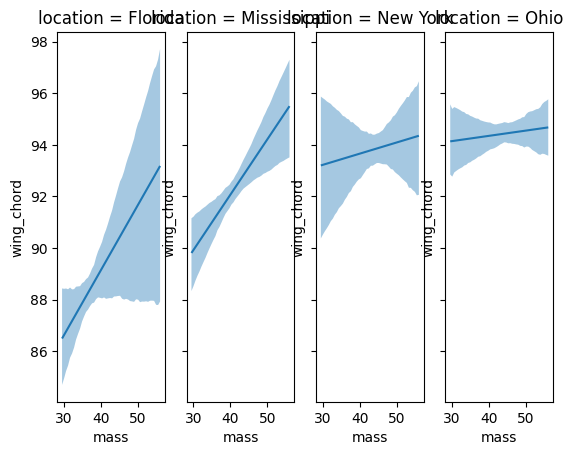

In [8]:
#some graphs
bmb.interpret.plot_predictions(model_wing1, idata_wing1, ["mass", "location"],
                               subplot_kwargs={"group":None, "panel":"location"},
                               legend=False,
                               fig_kwargs={"sharey":True, "sharex":True})

This graph was interesting. It showed that location had a huge effect on how mass affected the wing chord length. The birds in the more southern areas had a very upwards slope, whereas the birds in New York and Ohio seemed to have less of a relation between wing chord length and mass.

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 4 Axes>,
 array([<Axes: title={'center': 'location = Florida'}, xlabel='tarsus_length', ylabel='wing_chord'>,
        <Axes: title={'center': 'location = Mississippi'}, xlabel='tarsus_length', ylabel='wing_chord'>,
        <Axes: title={'center': 'location = New York'}, xlabel='tarsus_length', ylabel='wing_chord'>,
        <Axes: title={'center': 'location = Ohio'}, xlabel='tarsus_length', ylabel='wing_chord'>],
       dtype=object))

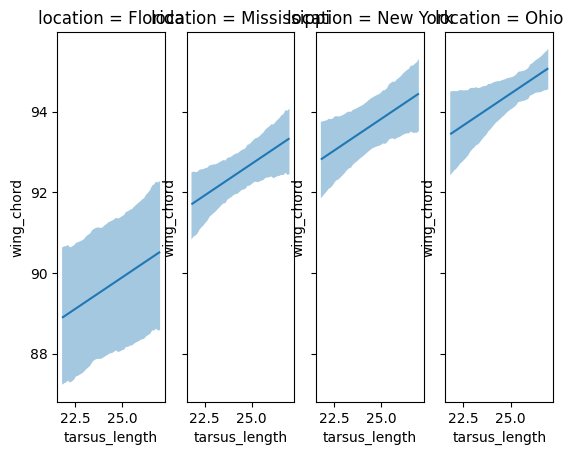

In [10]:
bmb.interpret.plot_predictions(model_wing1, idata_wing1, ["tarsus_length", "location"],
                               subplot_kwargs={"group":None, "panel":"location"},
                               legend=False,
                               fig_kwargs={"sharey":True, "sharex":True})

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 2 Axes>,
 array([<Axes: title={'center': 'sex = female'}, xlabel='tarsus_length', ylabel='wing_chord'>,
        <Axes: title={'center': 'sex = male'}, xlabel='tarsus_length', ylabel='wing_chord'>],
       dtype=object))

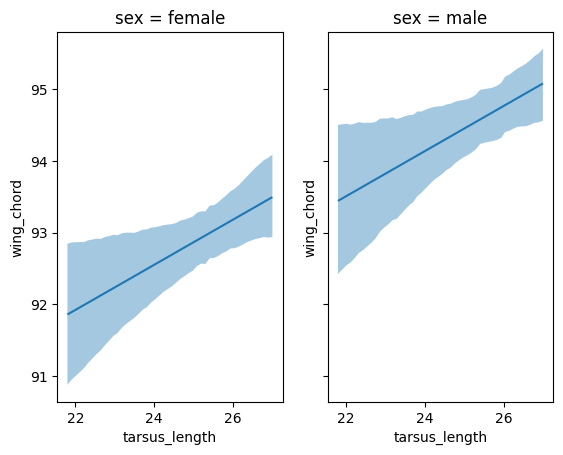

In [12]:
bmb.interpret.plot_predictions(model_wing1, idata_wing1, ["tarsus_length", "sex"],
                               subplot_kwargs={"group":None, "panel":"sex"},
                               legend=False,
                               fig_kwargs={"sharey":True, "sharex":True})

These graphs show that there is a correlation between tarsus length and wing chord length. The slope of the line is much more defined when using sex as a categorical variable as opposed to location, but the slopes are still somewhat defined using location. It seems like males and females have a similar slope, but males start higher, which makes sense because male cardinals typically have bigger wings than females.

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 640x480 with 4 Axes>,
 array([<Axes: title={'center': 'location = Florida'}, xlabel='tail', ylabel='wing_chord'>,
        <Axes: title={'center': 'location = Mississippi'}, xlabel='tail', ylabel='wing_chord'>,
        <Axes: title={'center': 'location = New York'}, xlabel='tail', ylabel='wing_chord'>,
        <Axes: title={'center': 'location = Ohio'}, xlabel='tail', ylabel='wing_chord'>],
       dtype=object))

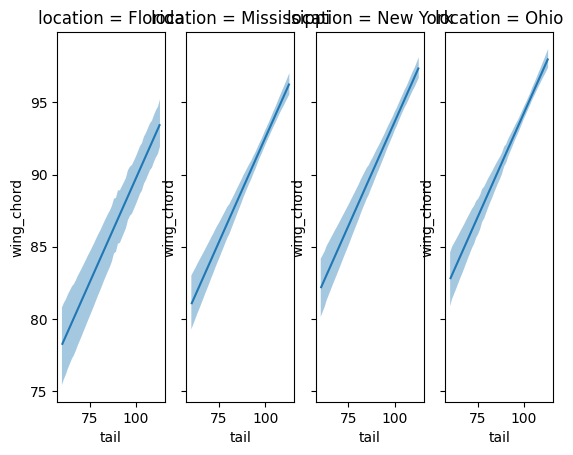

In [11]:
bmb.interpret.plot_predictions(model_wing1, idata_wing1, ["tail", "location"],
                               subplot_kwargs={"group":None, "panel":"location"},
                               legend=False,
                               fig_kwargs={"sharey":True, "sharex":True})

Tail length is shows to have the steepest correlation with wing chord length, which makes sense, considering that both the tail and the wings are used to fly. No matter what the mass of the bird is, and no matter the location of the bird, tail length has a distinct effect on wing chord length.

<Axes: xlabel='wing_chord'>

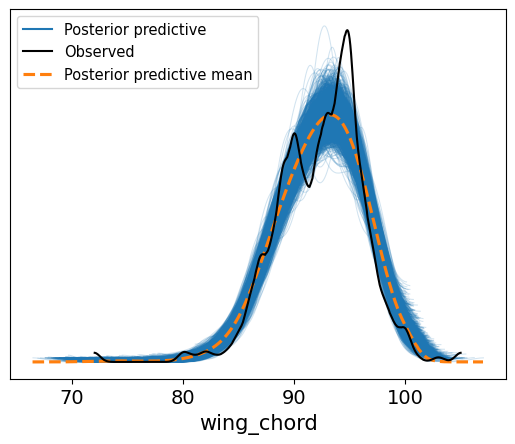

In [6]:
model_wing1.predict(idata_wing1, kind="response")
az.plot_ppc(idata_wing1)

The posterior predictive check looked pretty good. It could have been closer to the peak, but I think the posterior predictive mean followed the curves of the data well.

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

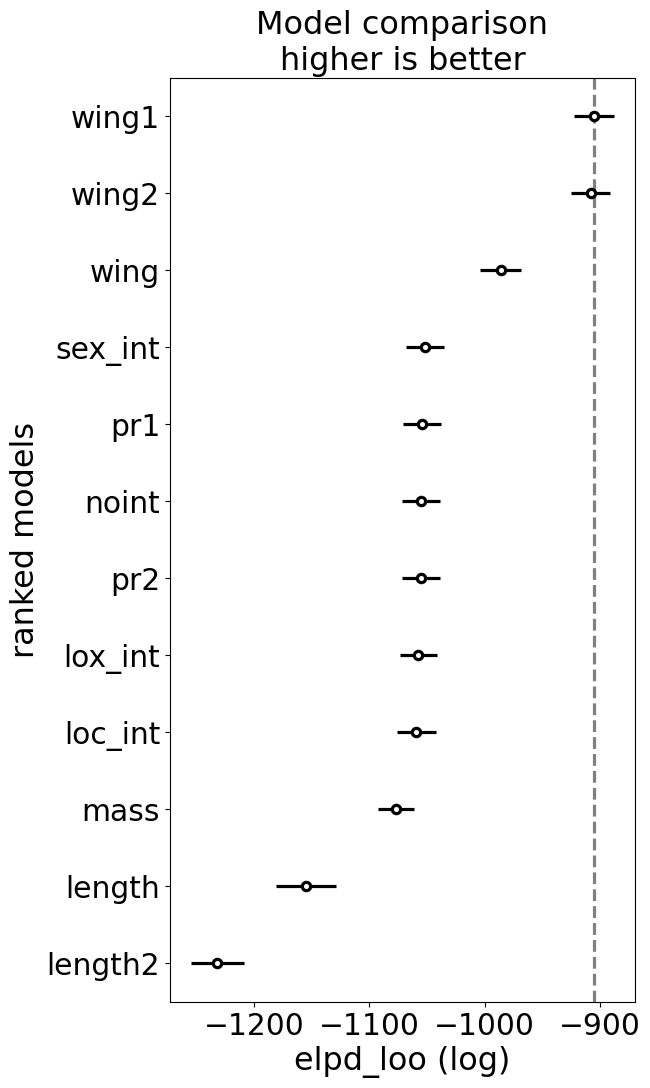

In [ ]:
# a final plot
az.plot_compare(az.compare({"length":idata_length, "noint":idata_all_noint, "pr1":idata_pr, "pr2":idata_pr2, "length2":idata_length2, "mass":idata_mass, "wing":idata_wing, "sex_int":idata_sex, "loc_int":idata_loc, "lox_int":idata_lox_int, "wing1":idata_wing1, "wing2":idata_wing2}))

This plot shows about all of the models I made for this project. All of the models in the middle that are on top of one another are the models using mass as the predicted, an idea which turned out to not be so smart, the reason therefore being that mass was actually causing changes in the other physical variables, not the other way around. This meant that I was predicting mass based on things that it influenced. I decided to move down the chain of things with wing chord length, ending up with a model that changed my final DAG. Upon first examination of the dataset, I didn't think that wing chord length was affected by anything other than location, sex, and mass. However, it seems that it can be affected by tarsus length and tail length alongside the prior three variables.

Wing1 was my best-performing model. It used mass, sex, location, crest length, tail length, and tarsus length as predictors, with interactions between mass and sex, mass and location, and crest length and sex. I do not think crest length was important in this model, though, and it has a weak influence on wing chord length (if any). Wing2 performed just as well as wing1, and it did not have crest length as a predictor.